<a href="https://colab.research.google.com/github/butchland/fastai_nb_explorations/blob/master/catdog_image_classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
!curl https://course.fast.ai/setup/colab | bash

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100   322  100   322    0     0   9757      0 --:--:-- --:--:-- --:--:--  9757
Updating fastai...
Done.


In [0]:
!pip install fastcore --upgrade
!pip install fastai2 --upgrade

     |████████████████████████████████| 194kB 8.6MB/s 


In [0]:
from fastai2.vision.all import *

In [0]:
path = untar_data(URLs.PETS)

In [0]:
(path/'images').ls()[:10]


(#10) [Path('/root/.fastai/data/oxford-iiit-pet/images/wheaten_terrier_96.jpg'),Path('/root/.fastai/data/oxford-iiit-pet/images/boxer_141.jpg'),Path('/root/.fastai/data/oxford-iiit-pet/images/miniature_pinscher_46.jpg'),Path('/root/.fastai/data/oxford-iiit-pet/images/beagle_100.jpg'),Path('/root/.fastai/data/oxford-iiit-pet/images/havanese_9.jpg'),Path('/root/.fastai/data/oxford-iiit-pet/images/saint_bernard_42.jpg'),Path('/root/.fastai/data/oxford-iiit-pet/images/Russian_Blue_100.jpg'),Path('/root/.fastai/data/oxford-iiit-pet/images/american_bulldog_126.jpg'),Path('/root/.fastai/data/oxford-iiit-pet/images/Persian_17.jpg'),Path('/root/.fastai/data/oxford-iiit-pet/images/german_shorthaired_107.jpg')]

In [0]:
Path.BASE_PATH = path/'images'

In [0]:
def is_cat(item):
  return 'cat' if item.name[0].isupper() else 'dog'

In [0]:
path = path/'images'
(is_cat(path.ls()[0]), is_cat(path.ls()[8]))

('dog', 'cat')

In [0]:
datablock = DataBlock(
    blocks=(ImageBlock,CategoryBlock),
    get_items=get_image_files,
    get_y=is_cat,
    splitter=RandomSplitter(seed=42),
    item_tfms=Resize(224),
    batch_tfms=aug_transforms()
)

Setting-up type transforms pipelines
Found 7390 items
2 datasets of sizes 5912,1478
Setting up Pipeline: PILBase.create
Setting up Pipeline: is_cat -> Categorize

Building one sample
  Pipeline: PILBase.create
    starting from
      /root/.fastai/data/oxford-iiit-pet/images/newfoundland_112.jpg
    applying PILBase.create gives
      PILImage mode=RGB size=489x500
  Pipeline: is_cat -> Categorize
    starting from
      /root/.fastai/data/oxford-iiit-pet/images/newfoundland_112.jpg
    applying is_cat gives
      dog
    applying Categorize gives
      TensorCategory(1)

Final sample: (PILImage mode=RGB size=489x500, TensorCategory(1))


Setting up after_item: Pipeline: Resize -> ToTensor
Setting up before_batch: Pipeline: 
Setting up after_batch: Pipeline: IntToFloatTensor -> AffineCoordTfm -> LightingTfm

Building one batch
Applying item_tfms to the first sample:
  Pipeline: Resize -> ToTensor
    starting from
      (PILImage mode=RGB size=489x500, TensorCategory(1))
    applying R

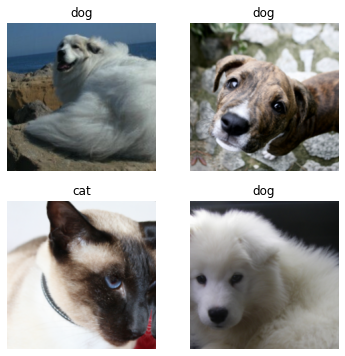

In [0]:
datablock.summary(path,show_batch=True)

In [0]:
dblk_trng = datablock.new(item_tfms=Resize(228), batch_tfms=aug_transforms())

In [0]:
dblk_trng.summary(path)

Setting-up type transforms pipelines
Found 7390 items
2 datasets of sizes 5912,1478
Setting up Pipeline: PILBase.create
Setting up Pipeline: is_cat -> Categorize

Building one sample
  Pipeline: PILBase.create
    starting from
      /root/.fastai/data/oxford-iiit-pet/images/newfoundland_112.jpg
    applying PILBase.create gives
      PILImage mode=RGB size=489x500
  Pipeline: is_cat -> Categorize
    starting from
      /root/.fastai/data/oxford-iiit-pet/images/newfoundland_112.jpg
    applying is_cat gives
      dog
    applying Categorize gives
      TensorCategory(1)

Final sample: (PILImage mode=RGB size=489x500, TensorCategory(1))


Setting up after_item: Pipeline: Resize -> ToTensor
Setting up before_batch: Pipeline: 
Setting up after_batch: Pipeline: IntToFloatTensor -> AffineCoordTfm -> LightingTfm

Building one batch
Applying item_tfms to the first sample:
  Pipeline: Resize -> ToTensor
    starting from
      (PILImage mode=RGB size=489x500, TensorCategory(1))
    applying R

In [0]:
dls = dblk_trng.dataloaders(path)

In [0]:
learn = cnn_learner(dls,resnet34,metrics=error_rate)

In [0]:
learn.fine_tune(4)

epoch,train_loss,valid_loss,error_rate,time
0,0.153130,0.025242,0.008119,00:50


epoch,train_loss,valid_loss,error_rate,time
0,0.055729,0.032463,0.005413,00:54
1,0.060191,0.019656,0.006766,00:54
2,0.030314,0.010731,0.004736,00:54
3,0.016538,0.010861,0.004060,00:54


In [0]:
learn.save('stage-1')

In [0]:
learn.recorder.summary()

Sequential (Input shape: ['64 x 3 x 228 x 228'])
Layer (type)         Output Shape         Param #    Trainable 
Conv2d               64 x 64 x 114 x 114  9,408      True      
________________________________________________________________
BatchNorm2d          64 x 64 x 114 x 114  128        True      
________________________________________________________________
ReLU                 64 x 64 x 114 x 114  0          False     
________________________________________________________________
MaxPool2d            64 x 64 x 57 x 57    0          False     
________________________________________________________________
Conv2d               64 x 64 x 57 x 57    36,864     True      
________________________________________________________________
BatchNorm2d          64 x 64 x 57 x 57    128        True      
________________________________________________________________
ReLU                 64 x 64 x 57 x 57    0          False     
_________________________________________________

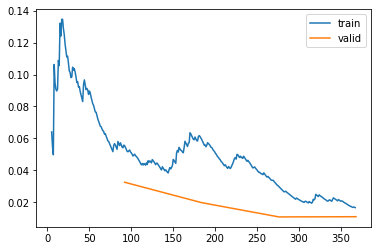

In [0]:
learn.recorder.plot_loss()

In [0]:
interpreter = ClassificationInterpretation.from_learner(learn)

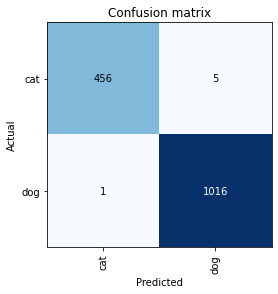

In [0]:
interpreter.plot_confusion_matrix()

In [0]:
interpreter.most_confused(1)

[('cat', 'dog', 5), ('dog', 'cat', 1)]

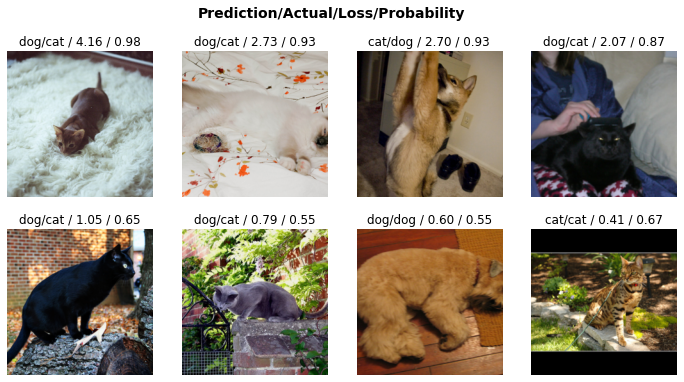

In [0]:
interpreter.plot_top_losses(8)

In [0]:
learn.export('catdog_classifier.pkl')

In [0]:
!mkdir -p /content/drive/My\ Drive/fastai_v4/models/catdog_pets

In [0]:
cp models/*.pth /content/drive/My\ Drive/fastai_v4/models/catdog_pets/.

In [0]:
cp catdog_classifier.pkl /content/drive/My\ Drive/fastai_v4/models/catdog_pets/.